# Collecte, Traitement, et Analyse de données de réseaux sociaux

Importation des librairies

In [45]:
import json
import re
import pandas as pd
from textblob import TextBlob
import random as rd
import matplotlib.pyplot as plt

Ouverture du fichier Json et nettoyage du text

In [5]:
#Ouverture du fichier jason
with open('versailles_tweets_100.json') as json_data:
    data_dict = json.load(json_data)

#Effacer tous les caractères spéciaux dans le texte et récupérer le texte propre dans une liste
liste_txt =[]
for dict in data_dict:
    dict["text"] = re.sub(r'[\W_]+',' ', dict["text"])
    liste_txt.append(dict['text'])

# Création et écriture dans le fichier zone d'atterissage
with open("zone_d'atterrissage.json", 'w') as f2:
    json.dump(data_dict, f2)





Identification de l'auteur de la publication

In [6]:
with open('versailles_tweets_100.json') as json_data:
    data = json.load(json_data)

liste_auteurs= []
for dict in data:
    liste_auteurs.append(dict['author_id'])
print(liste_auteurs)

['1339914264522461187', '1339914264522461187', '1339914264522461187', '1339914264522461187', '717025418', '992904738516717570', '992904738516717570', '736523371', '1471684208', '992904738516717570', '3169236915', '992904738516717570', '16267684', '60117154', '3169236915', '372993152', '372993152', '105241852', '2357913366', '717025418']


Extraction de la liste des hashtags et la liste des mentions de chaque publication

In [7]:
liste_hashtags = []
liste_mentions = []

for dict in data:
    #Extraction des hashtags
    hashtags = re.findall(r'\B#\w*[a-zA-Z]+\w*', dict['text'])
    liste_hashtags.append(hashtags)
    #Extraction des mentions
    mentions = re.findall(r'\B@\w*[a-zA-Z]+\w*', dict['text'])
    liste_mentions.append(mentions)

print(liste_hashtags)

print(liste_mentions)

[['#twitter225'], ['#SupportriceMazo', '#domie', '#CIV'], ['#CIV'], ['#jifa'], [], [], [], [], ['#versailles', '#nocturne', '#appollon'], [], [], [], [], [], [], [], [], [], [], []]
[[], ['@ericbailly24', '@maxigr04del'], [], [], [], ['@isabelle170516', '@leonna_julie', '@Steiner2502'], ['@LynLyna12', '@leonna_julie'], [], [], ['@leonna_julie'], ['@miliemelo82', '@kilianbridoux', '@LeMeneec'], ['@Polo82810715', '@lrestistant73'], [], [], ['@Pauluskupa'], ['@anniemacmanus'], ['@yebbasmith', '@anniemacmanus'], [], ['@AzmiAnees3'], []]


Analyse de sentiments de la publication

In [8]:
liste_sentiments = []
with open("zone_d'atterrissage.json") as f:
   clean_data  = json.load(f)
   
for dico in clean_data:
    sentiment = TextBlob(dico['text']).sentiment 
    liste_sentiments.append(sentiment[1])
print(liste_sentiments)


[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Identification du/des topics de la publication 

In [9]:
# On va attribuer des topics aléatoirement 
liste_topics = ['sport', 'politique', 'culture', 'humour']
twitts_topics = [rd.choice(liste_topics) for i in range(len(liste_auteurs))]
print(twitts_topics)

['culture', 'politique', 'politique', 'culture', 'culture', 'culture', 'politique', 'culture', 'politique', 'culture', 'sport', 'sport', 'culture', 'culture', 'culture', 'culture', 'humour', 'humour', 'culture', 'sport']


Création du DataFrame à exploiter

In [10]:
df_exploitation = pd.DataFrame(list(zip(liste_auteurs,liste_txt, liste_hashtags, liste_mentions, liste_sentiments, twitts_topics)), columns = ['ID', 'Texte','Hashtags', 'Mentions', 'Sentiments', 'Topics'])
df_exploitation

# sauvegarder notre DataFrame dans un fichier csv
df_exploitation.to_csv("zone_d'exploitation.csv", index=False)

Top K hashtags

In [39]:
# création d'un dictionnaire contenant un hashtag et le nombre de fois qu'il apparaît
liste_hash = [x for elem in liste_hashtags for x in elem] 
def occurence_hashtag(liste):
    dic = {}
    for i in range (len(liste)):
            dic[liste[i]] = liste.count(liste[i]) 
    return dic


def topK_hashtag(dico):
    K = int(input('entrer un entier K pour obtenir les K premiers hashtags'))
    tuple_sorted = sorted(dico.items(), key=lambda item:item[1], reverse = True)
    for i in range (K): 
        print(tuple_sorted[i])
           
topK_hashtag(occurence_hashtag(liste_hash))

('#CIV', 2)
('#twitter225', 1)
('#SupportriceMazo', 1)


Top K utilisateurs mentionnés

In [40]:
# création d'un dictionnaire contenant un utilisateur et le nombre de fois qu'il est mentionné
liste_ment = [x for elem in liste_mentions for x in elem] 
def occurence_mention(liste):
    occurences = []
    dic = {}
    for i in range (len(liste)):
            dic[liste[i]] = liste.count(liste[i]) 
    return dic

def topK_mention(dico):
    K = int(input('entrer un entier K pour obtenir les K premières mentions'))
    tuple_sorted = sorted(dico.items(), key=lambda item:item[1], reverse = True)
    for i in range (K): 
        print(tuple_sorted[i])
           
topK_hashtag(occurence_mention(liste_ment))



('@leonna_julie', 3)
('@anniemacmanus', 2)
('@ericbailly24', 1)


Top K utilisateur

In [41]:
# création d'un dictionnaire contenant un utilisateur et le nombre de fois qu'il a posté un tweet
def nbr_publis_utilisateur(liste):
    dic = {}
    for i in range (len(liste)):
        dic[liste[i]] = liste.count(liste[i]) 
    return dic

def topK_utilisateur(dico):
    K = int(input('entrer un entier K pour obtenir les K premiers utilisateurs'))
    tuple_sorted = sorted(dico.items(), key=lambda item:item[1], reverse = True)
    for i in range (K): 
        print(tuple_sorted[i])
           
topK_utilisateur(nbr_publis_utilisateur(liste_auteurs))


('1339914264522461187', 4)
('992904738516717570', 4)
('717025418', 2)


In [42]:
# création d'un dictionnaire contenant un topic et le nombre de fois qu'il apparait
def occurence_topic(liste):
    dic = {}
    for i in range (len(liste)):
            dic[liste[i]] = liste.count(liste[i]) 
    return dic

def topK_topic(dico):
    K = int(input('entrer un entier K pour obtenir les K premiers topics'))
    tuple_sorted = sorted(dico.items(), key=lambda item:item[1], reverse = True)
    for i in range (K): 
        print(tuple_sorted[i])
           
topK_hashtag(occurence_topic(twitts_topics))



('culture', 11)
('politique', 4)
('sport', 3)


L’ensemble de tweets d’un utilisateur spécifique

In [ ]:
def tweets_utilisateur():
    #création d'un dictionnaire contenant l'identifiant de l'utilsateur
    #comme clé et la liste de ses publications comme valuer
    df = df_exploitation[["ID", "Texte"]]
    ## nous avons trouvé cette méthode sur internet
    dico_tweets_utilisateur = df.groupby('ID').agg(lambda x: x.tolist()).to_dict('index')
    utilisateur = input("entrer l'id de l'utilisateur")
    if utilisateur in liste_auteurs:
        return dico_tweets_utilisateur[utilisateur]
    #problème: si on entre 2 fois un id non valide ça ne marche pas
    else:
        utilisateur = input("cet utilisateur n'existe pas, entrer un autre id d'utilisateur")
        return dico_tweets_utilisateur[utilisateur]

tweets_utilisateur()

{'Texte': ['Goumin des éléphants joueurs la même fatigue même twitter225',
  ' ericbailly24 maxigr04del mes tontons vous avez fait votre part JO prochain on ira en demi final au moins BRAVO à vous SupportriceMazo domie CIV',
  'Ah oui le sommeil là sera compliqué CIV est éliminé des JO Ahi on peut faire ça ',
  '31 juillet journée internationale de la femme africaine jifa']}

L’ensemble de tweets mentionnant un utilisateur spécifique

In [ ]:
def find_mention():
    #création d'un dictionnaire contenant l'identifiant de l'utilsateur
    #comme clé et la liste de ses publications comme valeurs
    df = df_exploitation[["ID", "Texte"]]
    #print(df)
    mention = (input("entrer mention"))
    return df['ID'][df['Texte'].str.contains(mention, regex=False)]


find_mention()


16    372993152
Name: ID, dtype: object

Les utilisateurs mentionnant un hashtag spécifique

In [ ]:
#fonction qui renvoie les utilisateurs mentionnant un hahshtag spécifique
##ça renvoie le texte pas les utilisateurs 
def find_hashtag ():
    df = df_exploitation[["ID", "Texte"]]
    hashtag = input("entrer hashtag")
    return df['ID'][df['Texte'].str.contains(hashtag, regex=False)]

find_hashtag()

8    1471684208
Name: ID, dtype: object

Représentations graphique

In [50]:
#Fonction qui permet de représenter les données sous forme de diagramme en bâtons
def representation_graph(dico, couleur):
    names = list(dico.keys())
    values = list(dico.values())
    plt.bar(names, values, color = couleur) ; plt.show()



In [ ]:
#Représentation graphique de l'occurence des hashtags
representation_graph(occurence_hashtag(twitts_topics), "blue")

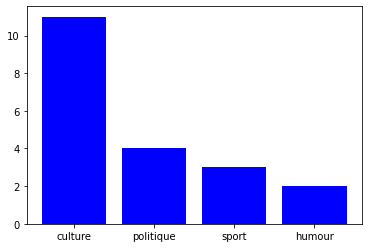

In [51]:
#Représentation graphique de l'occurence des topics
representation_graph(occurence_topic(twitts_topics), "blue")